In [1]:
import pandas as pd

In [2]:
data=pd.read_excel('processed_data_final.xlsx')

In [3]:
data

,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,...,Age_Senior-level,YearsAtCompany_Apprentice,YearsAtCompany_Expert,YearsAtCompany_Journeyman,YearsAtCompany_Master,Avg Time Spent(Mins)_0,Avg Time Spent(Mins)_1,Avg Time Spent(Mins)_2,Avg Time Spent(Mins)_3,Avg Time Spent(Mins)_4
0,0,2,2,-0.39,2,1,1,0,1,0,...,True,False,False,False,True,False,False,False,True,False
1,1,1,1,0.10,1,1,2,0,1,6,...,False,True,False,False,False,False,True,False,False,False
2,0,1,1,0.96,4,4,3,1,4,7,...,False,True,False,False,False,False,False,False,True,False
3,0,0,1,-0.89,5,1,4,1,3,1,...,False,False,False,True,False,False,False,False,True,False
4,0,2,1,0.10,1,3,5,1,1,7,...,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4295,0,2,2,-0.64,3,4,4405,0,2,1,...,False,False,False,True,False,True,False,False,False,False
4296,0,2,1,-0.52,4,3,4406,0,1,6,...,False,True,False,False,False,True,False,False,False,False
4297,0,2,1,-0.89,4,3,4407,1,1,2,...,False,True,False,False,False,False,True,False,False,False
4298,0,2,1,1.95,2,1,4408,1,2,7,...,False,True,False,False,False,False,True,False,False,False


In [4]:
X = data.drop(columns=['Attrition'])
y = data['Attrition']

In [5]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=60)

In [26]:
from sklearn.tree import DecisionTreeClassifier

# Your code to create and fit the DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier(max_depth=2)
tree_classifier.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [28]:
# Predict on the training set
y_pred_train = tree_classifier.predict(X_train)

In [29]:
# Evaluate accuracy on training set
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.8484496124031008


In [30]:
# Predict on the test set
y_pred_test = tree_classifier.predict(X_test)

In [31]:
# Evaluate accuracy on test set
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.8470930232558139


In [32]:
# Classification report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      1440
           1       0.66      0.12      0.21       280

    accuracy                           0.85      1720
   macro avg       0.76      0.56      0.56      1720
weighted avg       0.82      0.85      0.80      1720



In [33]:
# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))

Confusion Matrix:
[[1422   18]
 [ 245   35]]


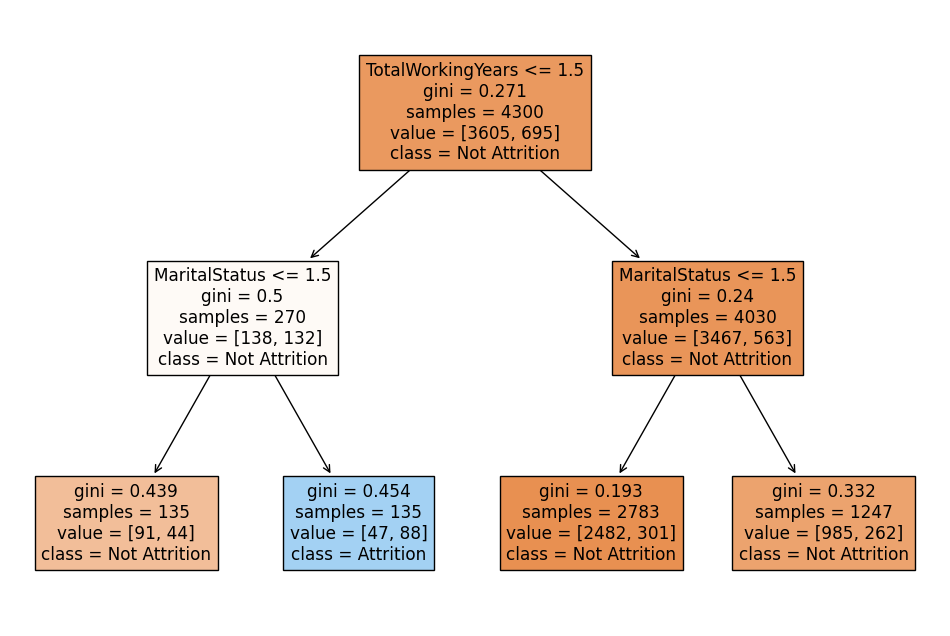

In [34]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(tree_classifier, filled=True, feature_names=X.columns, class_names=["Not Attrition", "Attrition"])
plt.show()

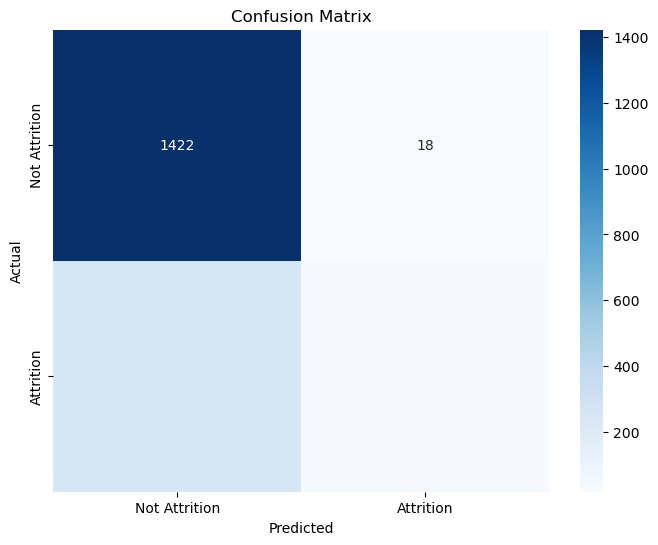

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict on the test set
y_pred_test = tree_classifier.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Not Attrition", "Attrition"], 
            yticklabels=["Not Attrition", "Attrition"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

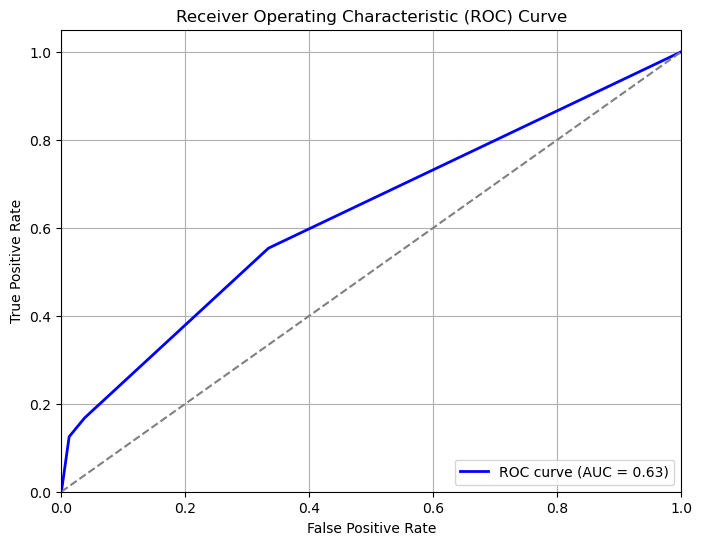

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities
y_probs = tree_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC
auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

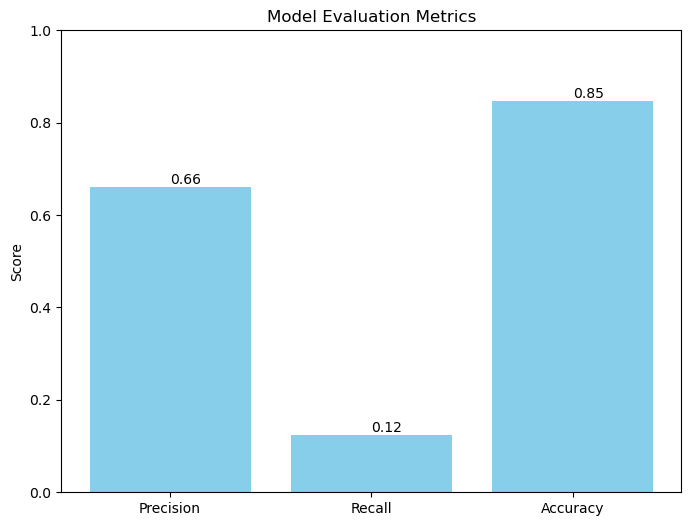

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score

# Calculate precision, recall, and accuracy
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
accuracy = accuracy_score(y_test, y_pred_test)

# Create bar chart
metrics = ['Precision', 'Recall', 'Accuracy']
values = [precision, recall, accuracy]

plt.figure(figsize=(8, 6))
bars = plt.bar(metrics, values, color='skyblue')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

plt.title('Model Evaluation Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()